## Data

In [7]:
## Read Data
df = read.csv('groceries.csv', header = FALSE)
head(df)
dim(df)

V1,V2,V3,V4
citrus fruit,semi-finished bread,margarine,ready soups
tropical fruit,yogurt,coffee,
whole milk,,,
pip fruit,yogurt,cream cheese,meat spreads
other vegetables,whole milk,condensed milk,long life bakery product
whole milk,butter,yogurt,rice


[1] 15296     4

In [8]:
## Read Transactions
library(arules)
df = read.transactions('groceries.csv', 
                       sep = ',', rm.duplicates = TRUE)
summary(df)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

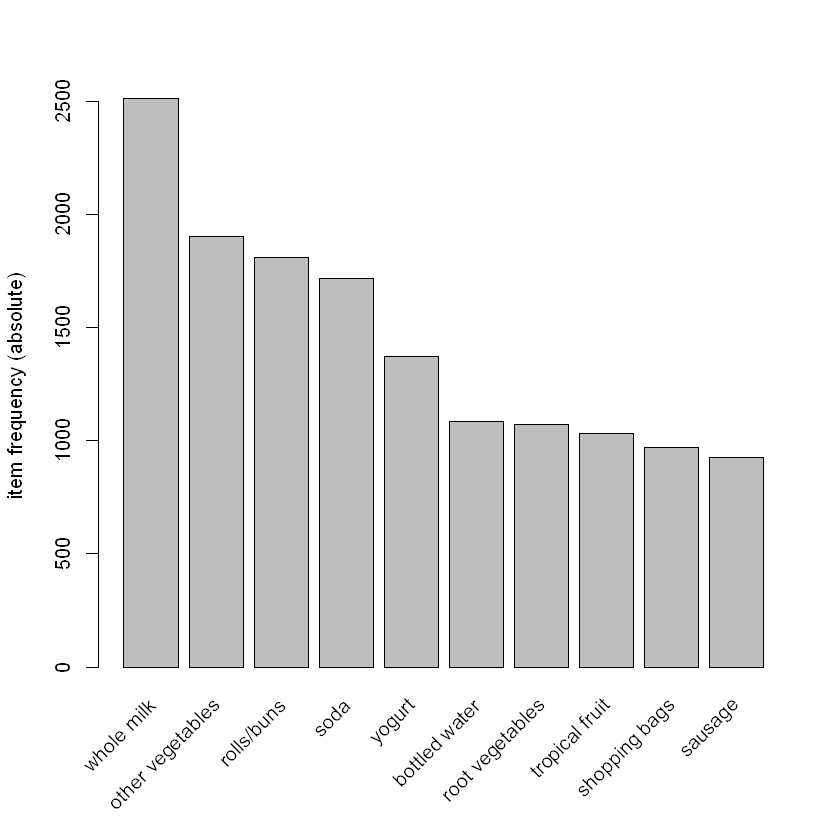

In [9]:
# Display top 10 items
itemFrequencyPlot(df, topN = 10, type='absolute')

## 1. Apriori

In [18]:
# Train Apriori to the Data
rules = apriori(data = df, parameter = list(support = 0.001, 
                                            confidence = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [19]:
summary(rules)

set of 410 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 29 229 140  12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     4.0     4.0     4.3     5.0     6.0 

summary of quality measures:
    support          confidence        lift          count     
 Min.   :0.00102   Min.   :0.80   Min.   : 3.1   Min.   :10.0  
 1st Qu.:0.00102   1st Qu.:0.83   1st Qu.: 3.3   1st Qu.:10.0  
 Median :0.00122   Median :0.85   Median : 3.6   Median :12.0  
 Mean   :0.00125   Mean   :0.87   Mean   : 4.0   Mean   :12.3  
 3rd Qu.:0.00132   3rd Qu.:0.91   3rd Qu.: 4.3   3rd Qu.:13.0  
 Max.   :0.00315   Max.   :1.00   Max.   :11.2   Max.   :31.0  

mining info:
 data ntransactions support confidence
   df          9835   0.001        0.8

In [20]:
# show Top 10 results
options(digits=2)
inspect(sort(rules, by = 'lift')[1:10])

     lhs                        rhs               support confidence lift count
[1]  {liquor,                                                                  
      red/blush wine}        => {bottled beer}     0.0019       0.90 11.2    19
[2]  {citrus fruit,                                                            
      fruit/vegetable juice,                                                   
      other vegetables,                                                        
      soda}                  => {root vegetables}  0.0010       0.91  8.3    10
[3]  {oil,                                                                     
      other vegetables,                                                        
      tropical fruit,                                                          
      whole milk,                                                              
      yogurt}                => {root vegetables}  0.0010       0.91  8.3    10
[4]  {citrus fruit,                     

In [21]:
# sort by the most likely rules
inspect(sort(rules, by = 'confidence')[1:10])

     lhs                     rhs                support confidence lift count
[1]  {rice,                                                                  
      sugar}              => {whole milk}        0.0012          1  3.9    12
[2]  {canned fish,                                                           
      hygiene articles}   => {whole milk}        0.0011          1  3.9    11
[3]  {butter,                                                                
      rice,                                                                  
      root vegetables}    => {whole milk}        0.0010          1  3.9    10
[4]  {flour,                                                                 
      root vegetables,                                                       
      whipped/sour cream} => {whole milk}        0.0017          1  3.9    17
[5]  {butter,                                                                
      domestic eggs,                                            

In [23]:
# target items
rules<-apriori(data=df, parameter=list(supp=0.001,conf = 0.8, minlen=2), 
               appearance = list(default="lhs",rhs='whole milk'),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by='confidence')
inspect(rules[1:5])

    lhs                     rhs          support confidence lift count
[1] {rice,                                                            
     sugar}              => {whole milk}  0.0012          1  3.9    12
[2] {canned fish,                                                     
     hygiene articles}   => {whole milk}  0.0011          1  3.9    11
[3] {butter,                                                          
     rice,                                                            
     root vegetables}    => {whole milk}  0.0010          1  3.9    10
[4] {flour,                                                           
     root vegetables,                                                 
     whipped/sour cream} => {whole milk}  0.0017          1  3.9    17
[5] {butter,                                                          
     domestic eggs,                                                   
     soft cheese}        => {whole milk}  0.0010          1  3.9    10


Loading required package: grid


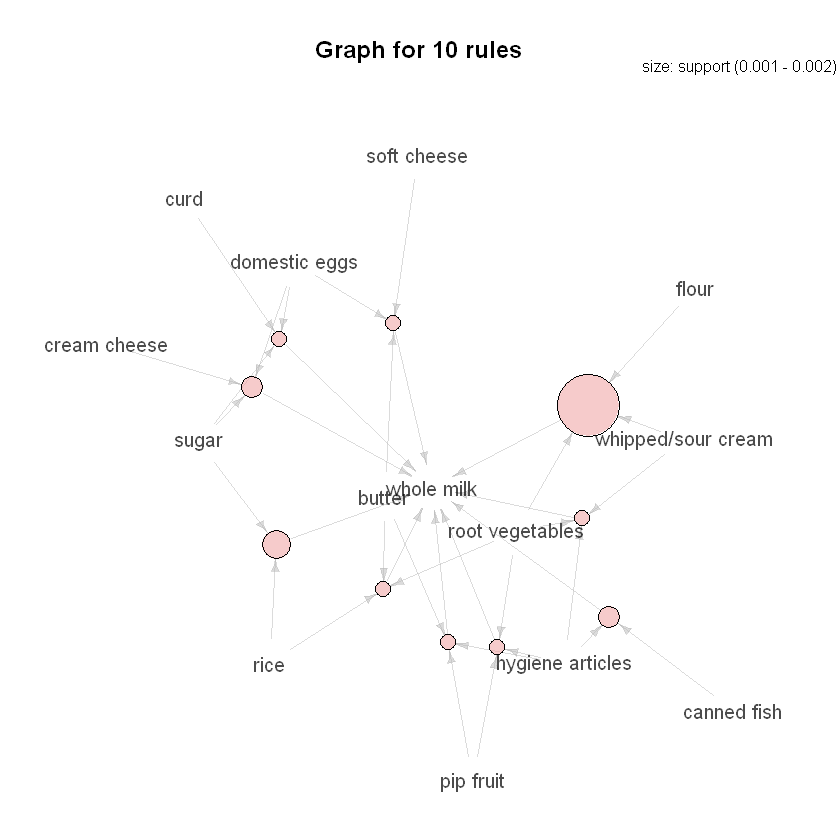

In [24]:
library(arulesViz)
plot(rules[1:10],method='graph',shading=NA)

## 2. Eclat

In [25]:
# Training Eclat to the Data
rules = eclat(data = df, parameter = list(support = 0.003, minlen = 2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.003      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 29 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [136 item(s)] done [0.00s].
creating sparse bit matrix ... [136 row(s), 9835 column(s)] done [0.00s].
writing  ... [2090 set(s)] done [0.02s].
Creating S4 object  ... done [0.02s].


In [26]:
# Visualize Top 10 results
inspect(sort(rules, by = 'support')[1:10])

     items                              support count
[1]  {other vegetables,whole milk}      0.075   736  
[2]  {rolls/buns,whole milk}            0.057   557  
[3]  {whole milk,yogurt}                0.056   551  
[4]  {root vegetables,whole milk}       0.049   481  
[5]  {other vegetables,root vegetables} 0.047   466  
[6]  {other vegetables,yogurt}          0.043   427  
[7]  {other vegetables,rolls/buns}      0.043   419  
[8]  {tropical fruit,whole milk}        0.042   416  
[9]  {soda,whole milk}                  0.040   394  
[10] {rolls/buns,soda}                  0.038   377  


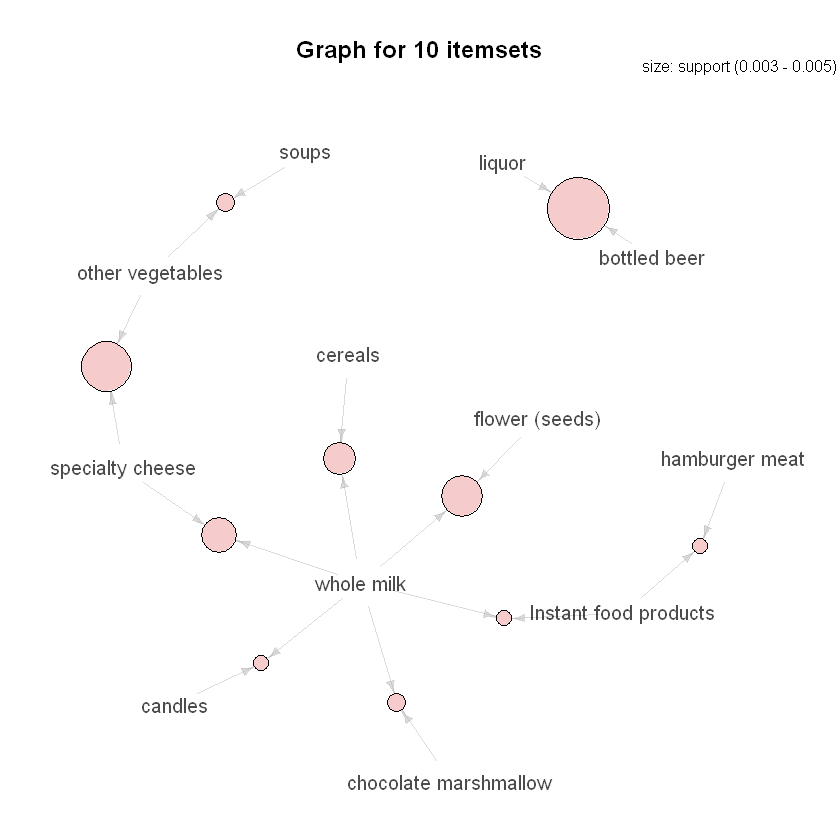

In [27]:
library(arulesViz)
plot(rules[1:10],method='graph',shading=NA)